In [1]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

from gempy.bayesian import plot_posterior as pp
import seaborn as sns
from importlib import reload
from matplotlib.ticker import StrMethodFormatter

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Model definition

In [2]:
y_obs = [2.12]
y_obs_list = [2.12, 2.06, 2.08, 2.05, 2.08, 2.09,
              2.19, 2.07, 2.16, 2.11, 2.13, 1.92]
np.random.seed(4003)

In [3]:
def create_prob_model(conf):
    if conf == 'n_s':
        with pm.Model() as model:
            mu = pm.Normal('$\mu$', 2.08, .07)
            sigma = pm.Gamma('$\sigma$', 0.3, 3)
            y = pm.Normal('$y$', mu, sigma, observed=y_obs_list)
    if conf == 'n_o':
        with pm.Model() as model:
            mu = pm.Normal('$\mu$', 2.08, .07)
            sigma = pm.Gamma('$\sigma$', 0.3, 3
                            )
            y = pm.Normal('$y$', mu, sigma, observed=y_obs)
    if conf == 'u_s':
        with pm.Model() as model:
            mu = pm.Uniform('$\mu$', 0, 10)
            sigma = pm.Gamma('$\sigma$', 0.3, 3
                            )
            y = pm.Normal('$y$', mu, sigma, observed=y_obs_list)
    if conf == 'u_o':
        with pm.Model() as model:
            mu = pm.Uniform('$\mu$', 0, 10)
            sigma = pm.Gamma('$\sigma$', 0.3, 3                            )
            y = pm.Normal('$y$', mu, sigma, observed=y_obs)
    
    return model

### Normal-several points

In [4]:
with pm.Model() as model:
    mu = pm.Normal('$\mu$', 2.08, .07)
    sigma = pm.Gamma('$\sigma$', 0.3, 3
                    )
    y = pm.Normal('$y$', mu, sigma, observed=y_obs_list)

In [5]:
mu

$\mu$

In [6]:
sigma

$\sigma$

In [7]:
y

$y$

## Sampling

In [8]:
with model:
    prior = pm.sample_prior_predictive(1000)
    trace = pm.sample(1000, discard_tuned_samples=False)
    post = pm.sample_posterior_predictive(trace)

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5744.82draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 6000/6000 [00:02<00:00, 2157.78it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cc274e198>,
      dtype=object)

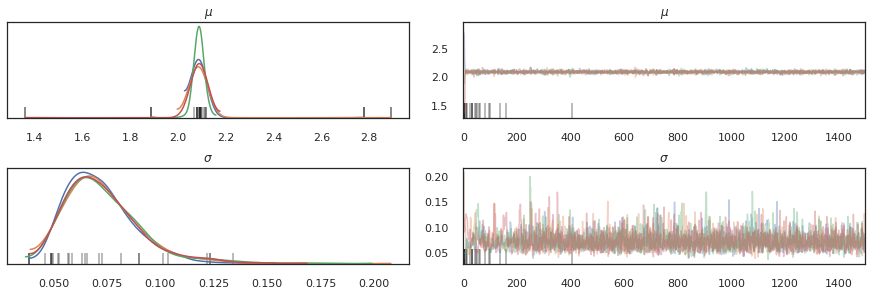

In [9]:
az.plot_trace(data)

#### Raw observations:

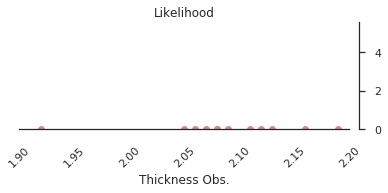

In [10]:

reload(pp)
p = pp.PlotPosterior(data)
p.create_figure(figsize=(9,3), joyplot=False, marginal=False)
p.plot_normal_likelihood('$\mu$', '$\sigma$', '$y$', iteration=-1, hide_bell=True)
p.likelihood_axes.set_xlim(1.90,2.2)
p.likelihood_axes.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
for tick in p.likelihood_axes.get_xticklabels():
    tick.set_rotation(45)
plt.savefig('Raw_Observations.svg')

#### Final inference

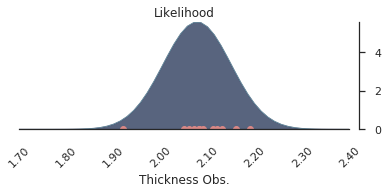

In [11]:

reload(pp)
p = pp.PlotPosterior(data)
p.create_figure(figsize=(9,3), joyplot=False, marginal=False)
p.plot_normal_likelihood('$\mu$', '$\sigma$', '$y$', iteration=-1, hide_lines=True)
p.likelihood_axes.set_xlim(1.70,2.40)
p.likelihood_axes.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
for tick in p.likelihood_axes.get_xticklabels():
    tick.set_rotation(45)
plt.savefig('Final_inference.svg')

### Joyplot

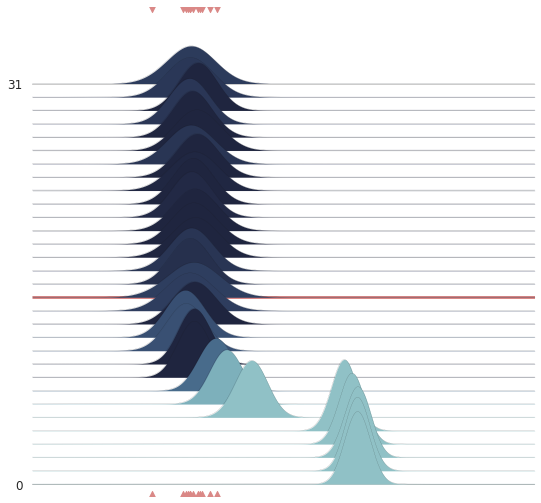

In [12]:
%matplotlib inline
reload(pp)
p = pp.PlotPosterior(data)

p.create_figure(figsize=(9,9), joyplot=True, marginal=False, likelihood=False, n_samples= 31)
p.plot_joy(('$\mu$', '$\sigma$'), '$y$', iteration=14)
plt.savefig('Joy.svg')

### Join probability

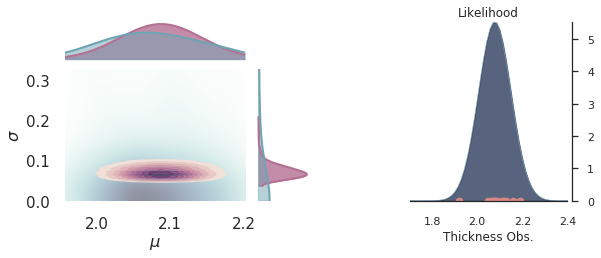

In [13]:
%matplotlib inline
reload(pp)
p = pp.PlotPosterior(data)

p.create_figure(figsize=(9,5), joyplot=False, marginal=True, likelihood=True)
p.plot_marginal(var_names = ['$\mu$', '$\sigma$'],
                plot_trace=False, credible_interval=.93, kind='kde',
                joint_kwargs={'contour':True, 'pcolormesh_kwargs':{'interpolation':'gaussian'}},
                joint_kwargs_prior={'contour':False, 'pcolormesh_kwargs':{'interpolation':'gaussian'}})

p.plot_normal_likelihood('$\mu$', '$\sigma$', '$y$', iteration=-1, hide_lines=True)
p.likelihood_axes.set_xlim(1.70,2.40)
plt.savefig('n_s.pdf')

### Full plot

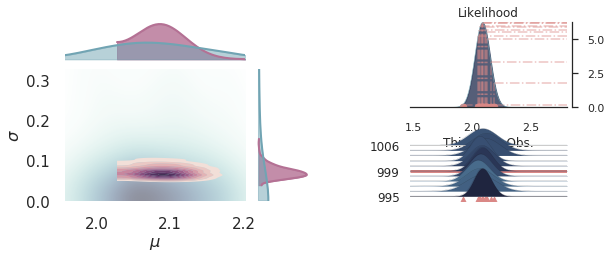

In [14]:
%matplotlib inline
reload(pp)
p = pp.PlotPosterior(data)

p.create_figure(figsize=(9,5), joyplot=True, marginal=True, likelihood=True, n_samples= 11)

p.plot_posterior(['$\mu$', '$\sigma$'], ['$\mu$', '$\sigma$'], '$y$', 1000,
                marginal_kwargs={'plot_trace':False, 'credible_interval':.93, 'kind':'kde',
                                'joint_kwargs':{'contour':True,
                                               'pcolormesh_kwargs':{'interpolation':'gaussian'}},
                                 'joint_kwargs_prior':{'contour':False,
                                                      'pcolormesh_kwargs':{'interpolation':'gaussian'}},#'vmax':.6, 'vmin':0}},
                                #                                         'snap':True,
                                #                                          'linewidths':.000001}}
                                },
                likelihood_kwargs={#'x_range':(1.70, 2.40)
                })

plt.savefig('full.pdf')

###  Normal One point:

In [15]:
model = create_prob_model('n_o')

with model:
    prior = pm.sample_prior_predictive(1000)
    trace = pm.sample(10000, discard_tuned_samples=False)
    post = pm.sample_posterior_predictive(trace)

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:08<00:00, 4833.98draws/s]
There were 978 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1307 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7173345402278775, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1159 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7160838158836401, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1281 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 42000/42000 [00:19<00:00, 2120.13it/s]


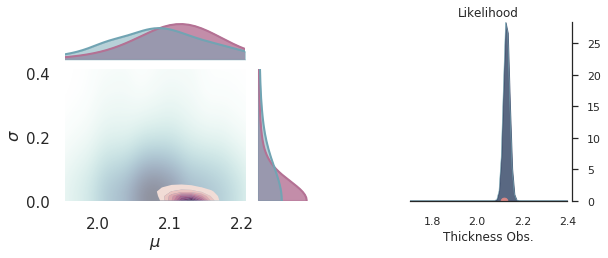

In [16]:
%matplotlib inline
reload(pp)
p = pp.PlotPosterior(data)

p.create_figure(figsize=(9,5), joyplot=False, marginal=True, likelihood=True)
p.plot_marginal(var_names = ['$\mu$', '$\sigma$'],
                plot_trace=False, credible_interval=.93, kind='kde',
                joint_kwargs={'contour':True, 'pcolormesh_kwargs':{'interpolation':'gaussian'}},
                joint_kwargs_prior={'contour':False, 'pcolormesh_kwargs':{'interpolation':'gaussian'}})

p.plot_normal_likelihood('$\mu$', '$\sigma$', '$y$', iteration=-1, hide_lines=True)
p.likelihood_axes.set_xlim(1.70,2.40)

plt.savefig('n_o.pdf')

### Uniform one point

In [17]:
model = create_prob_model('u_o')

with model:
    prior = pm.sample_prior_predictive(1000)
    trace = pm.sample(10000, discard_tuned_samples=False)
    post = pm.sample_posterior_predictive(trace)

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5421.58draws/s]
There were 1700 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.592479284587089, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1578 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6053996916085085, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1836 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5959188097443363, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1623 divergences after tuning. Increase `target_accept`

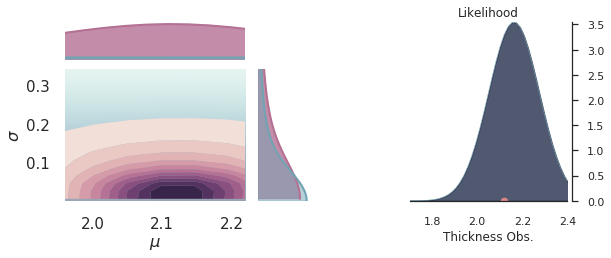

In [18]:
%matplotlib inline
reload(pp)
p = pp.PlotPosterior(data)

p.create_figure(figsize=(9,5), joyplot=False, marginal=True, likelihood=True)
p.plot_marginal(var_names = ['$\mu$', '$\sigma$'],
                plot_trace=False, credible_interval=.93, kind='kde',
                joint_kwargs={'contour':True, 'pcolormesh_kwargs':{'interpolation':'gaussian'}},
                joint_kwargs_prior={'contour':False, 'pcolormesh_kwargs':{'interpolation':'gaussian'}})

p.axjoin.set_xlim(1.96, 2.22)
p.plot_normal_likelihood('$\mu$', '$\sigma$', '$y$', iteration=-6, hide_lines=True)
p.likelihood_axes.set_xlim(1.70, 2.40)
plt.savefig('u_o.pdf')

In [19]:
with model:
    a = pm.find_MAP()

/home/miguel/.conda/envs/m_gempy/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = 3.5018, ||grad|| = 22.005: 100%|██████████| 31/31 [00:00<00:00, 5872.78it/s]           


### Uniform several points

In [20]:
model = create_prob_model('u_s')

with model:
    prior = pm.sample_prior_predictive(1000)
    trace = pm.sample(10000, discard_tuned_samples=False)
    post = pm.sample_posterior_predictive(trace)

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5837.00draws/s]
The acceptance probability does not match the target. It is 0.8925791322789187, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8916482997406495, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 42000/42000 [00:19<00:00, 2170.94it/s]


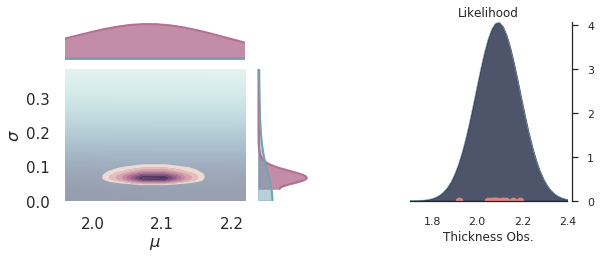

In [21]:
%matplotlib inline
reload(pp)
p = pp.PlotPosterior(data)

p.create_figure(figsize=(9,5), joyplot=False, marginal=True, likelihood=True)
p.plot_marginal(var_names = ['$\mu$', '$\sigma$'],
                plot_trace=False, credible_interval=.93, kind='kde',
                joint_kwargs={'contour':True, 'pcolormesh_kwargs':{'interpolation':'gaussian'}},
                joint_kwargs_prior={'contour':False, 'pcolormesh_kwargs':{'interpolation':'gaussian'}})

p.plot_normal_likelihood('$\mu$', '$\sigma$', '$y$', iteration=-5, hide_lines=True)
p.axjoin.set_xlim(1.96, 2.22)
p.likelihood_axes.set_xlim(1.70,2.4)
plt.savefig('u_s.pdf')